## Predicting Gold Price using Machine Learning
###### Name- `BHASKAR LAKHPATI` Batch- August 2022 

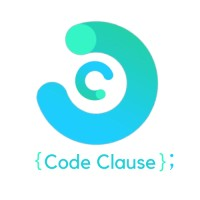

# what our dataset  all about

This dataset will contain 6 variables as follows:

*  Date: date for which market data is collected.


*  SPX: Standard & Poor's market-capitalization-weighted index of 500 leading publicly traded companies in the U.S.


*  GLD: SPDR Gold Shares ETF.


*  USO: The United States Oil Fund, ETF.


*  SLV: Silver ETF. Purely reflects the price movements of silver.


*  EUR/USD: euro against U.S. dollar pair.

# intial steps

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
sns.set_context("notebook")
sns.set_style("whitegrid")

In [3]:
gold_df = pd.read_csv(r"C:\Users\91901\Music\gld_price_data.csv")

# Pre-processing
We will now inspect various aspects of the dataset for missing, incorrect data types etc

In [4]:
gold_df.head() #check the first 5 observations

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_df.shape # Check dataset shape

(2290, 6)

In [6]:
gold_df.describe() # Summary statistics

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_df.isnull().sum() # Check for missing data

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_df.info() # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_df['Date']=pd.to_datetime(gold_df['Date']) # Change df series Date dtype from 'object' to 'datetime'

In [10]:
gold_df.info() # Check if the change has taken place

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


# Exploratory Data Analysis

In [11]:
correlation = gold_df.corr()

<AxesSubplot:>

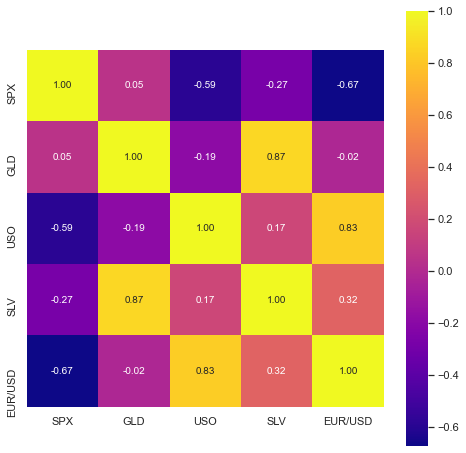

In [12]:
# Correlation heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':10}, cmap='plasma')

In [13]:
# Correlation of GLD with other stock prices
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

From the output above, we can see that GLD and SLV are positively correlated (0.87). Very slight positive correlation with SPX and some negative correlation with EUR/USD & USO.

<AxesSubplot:xlabel='GLD', ylabel='Count'>

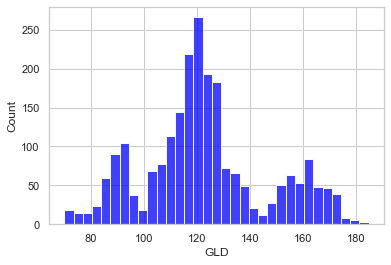

In [14]:
# Check distribution of gold prices over time
sns.histplot(gold_df['GLD'],color='blue')

 # Developing machine learning model

Now we will start the process of shaping our data for machine learning application.

In [15]:
X = gold_df.drop(['Date','GLD'],axis=1) # Setting up the training data, removing the target variable and the date variable
Y = gold_df['GLD'] # Setting up our target variable as a separate pandas series on its own

In [16]:
X.head() # Visually inspect dataframe X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [17]:
Y.head() # Visually inspect series Y

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

For setting up the machine learning model, we will now split the data into Train and Test segments.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
regressor.fit(X_train,Y_train) # training the model

RandomForestRegressor()

In [21]:
test_data_prediction = regressor.predict(X_test) # prediction on Test Data


In [22]:
test_data_prediction

array([122.66239933, 130.01120322, 127.4898997 ,  96.65859755,
       118.93690062, 114.57409935, 124.89150124, 117.66839917,
       108.08590128,  98.14869939,  95.45549916, 167.84159774,
       149.24480227, 116.53259994, 170.57780068,  84.86569959,
       123.02939874, 109.80549728, 113.0819008 , 131.6495023 ,
       124.31159874, 113.64070082, 115.91900089, 108.78219976,
       108.68030179, 125.87289918, 119.31419992, 112.48529905,
       113.44060157, 125.32529926, 145.99400065,  89.4824998 ,
       167.83830033, 113.82229933, 108.39760109, 120.14490111,
       141.46079807, 161.14250105, 174.00179792, 153.26610143,
       119.47280116, 113.45480051, 121.40759933, 113.60479895,
       122.07820001, 108.19670113,  88.68649859, 114.42279923,
       129.57820204, 117.82910135, 104.3437998 , 129.75240228,
       107.09989854, 160.86890371, 131.59529984, 118.59020014,
       146.92190084, 135.78900226,  95.66050089, 124.6758014 ,
       115.06559831,  86.18540033, 104.30509927, 113.91

# Evaluate Model

In [23]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9896241837982649


We can see that we have a very low R-squared error value, which hints towards a well-performing model. Let us now test how our actual value and predicted value differs over time.

In [24]:
Y_test = list(Y_test)

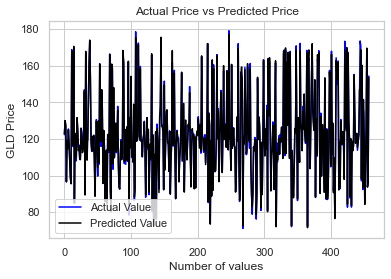

In [25]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()